#### Necessary Imports & Installs

In [78]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Function to be differentiated: $f(x)=3x^2 - 4x + 5$ 

In [79]:
def f(x):
  return 3*x**2 - 4*x +5

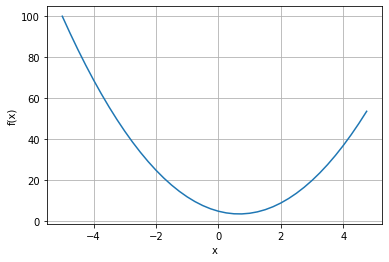

In [80]:
# Plotting the function
x = np.arange(-5, 5, 0.25)
y = f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

The continous function _f(x)_ is said to be differentiable at point _a_ if the derivitive as defined below exists.

$\lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$


In [81]:
h = 0.00000001

# Taking the derivitive at a = 3
a = 3.0
df_da = (f(a+h)-f(a))/h
print(f"The derivitive at {a} is {df_da}")

# Taking the derivitive at a = -3
a = -3.0
df_da = (f(a+h)-f(a))/h
print(f"The derivitive at {a} is {df_da}")

# Taking the derivitive at a = 2/3
a = 2/3
df_da = (f(a+h)-f(a))/h
print(f"The derivitive at {a} is {df_da}")

The derivitive at 3.0 is 14.00000009255109
The derivitive at -3.0 is -22.00000039920269
The derivitive at 0.6666666666666666 is 0.0


Using a multi-variable function: $f(a,b,c) = a * b + c$ 

In [82]:
def f(a=2.0, b=-3.0, c=10.0):
  return a*b + c

d1 = f()
h = 0.0001

# Taking the derivitive with respect to a
d2 = f(a=2.0+h)
dd_da = (d2-d1) / h
print(f"The derivitive at 'a' is {dd_da}")

# Taking the derivitive with respect to b
d2 = f(b=-3.0+h)
dd_db = (d2-d1) / h
print(f"The derivitive at 'b' is {dd_db}")

# Taking the derivitive with respect to c
d2 = f(c=10.0+h)
dd_dc = (d2-d1) / h
print(f"The derivitive at 'c' is {dd_dc}")

The derivitive at 'a' is -3.000000000010772
The derivitive at 'b' is 2.0000000000042206
The derivitive at 'c' is 0.9999999999976694


Using a Value Class to keep track of our dynamic computational graph


In [89]:
class Value:
  """Class to wrap up our scalar values."""
  def __init__(self, data, _children=(), _op="", label=""):
    self.data = data
    self.grad = 0.0
    self.label = label
    self._prev = set(_children)
    self._op = _op

  def __add__(self, other):
    out = Value(self.data + other.data, _children=(self, other), _op='+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children=(self, other), _op='*')
    return out

  def __repr__(self):
    return f"Value(data={self.data}, label={self.label})"

Defining the function with Value objects: $f(a,b,c) = a * b + c$ 


In [90]:
a = Value(2.0, label='a')
b = Value(3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
print(d)

Value(data=16.0, label=d)


In [95]:
# Manually setting each derivitives (with Chain rule)
d.grad = 1 # dd/dd
e.grad = 1 # dd/de
c.grad = 1 # dd/dc
b.grad = a.data * e.grad # dd/da = de/da * dd/de
a.grad = b.data * e.grad # dd/da = de/db * dd/de

Visualizing our computational graph for the function $f(a,b,c) = a * b + c$ 

In [85]:
#!pip install graphviz

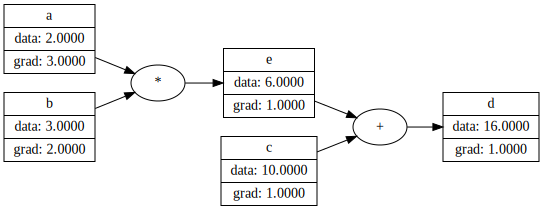

In [96]:
# The code below is strictly for visualization purposes only!!!
from graphviz import Digraph

def trace(root):
    '''Builds a set of all nodes and edges in a graph'''
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # creating a rectangular 'record' node for every value in the graph
        dot.node(name=uid, label=f"{n.label}|data:{n.data: .4f}|grad:{n.grad: .4f}", shape='record')
        if n._op:
            #if the value is resulting from some operation, (not a leaf node)
            dot.node(name=uid+n._op, label = n._op)
            dot.edge(uid+n._op,uid) #connect this op node to the resulting node
    for n1, n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot

draw_dot(d)

The End! Visit `AutoGrad.ipynb` for continuation.